# Exercise 1

Consider the **Breast Cancer Wisconsin** dataset. It contains features computed from digitized images of fine needle aspirate (FNA) of breast masses. These features are used to classify the tumors into malignant (cancerous) or benign (non-cancerous). 

You can load the dataset as follows:

```python
from sklearn.datasets import load_breast_cancer
import numpy as np

data = load_breast_cancer()
X = data.data
X = np.transpose(X)
Y = data.target
```

Here’s an overview of the dataset:
- **Number of Instances**: 569
- **Number of Features**: 30 numeric (real-valued features)
- **Target Variable**: Binary (0 for malignant, 1 for benign)

## Tasks

1. **Implement a function** that, provided the dataset and the number of components to keep, exploits the covariance matrix and its eigenvalues to compute the principal components of the dataset.  
   *(Hint: Use `np.cov(X)` to compute the covariance matrix.)*

2. **Compute the first two principal components** of the dataset by using the function implemented in the previous step.

3. **Compare and comment** on the results of the previous step in terms of principal components with the ones obtained by means of the exact SVD of rank $ r = 2 $.  
   *(Hint: Use Singular Value Decomposition to verify the results.)*

4. **Plot the relationships** between the first 5 features in the original dataset.

5. **Make a scatterplot** of the first two principal components of the patients. Compare the result with the ones from the previous point.

6. **Compute and plot the explained variance ratio**, defined as:

   $$
   \text{Explained Variance Ratio} = \frac{\text{Variance of a Principal Component}}{\text{Total Variance}}
   $$

   *(Hint: It can be computed by exploiting the eigenvalues of the principal components.)*

7. **What is the percentage of information lost** by selecting 2 components?  
   *(Compute the total variance explained by the first two components and compare it to the total variance.)*


In [113]:
from sklearn.datasets import load_breast_cancer
import numpy as np

data = load_breast_cancer()
X = data.data
X = np.transpose(X)
Y = data.target

# Check for correctness
print("The dataset has 30 features and 569 samples, arranged in a {}x{} matrix".format(X.shape[0], X.shape[1]))
print("The values of the target are: {}".format(np.unique(Y)))

The dataset has 30 features and 569 samples, arranged in a 30x569 matrix
The values of the target are: [0 1]


In [114]:
import pandas as pd

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the DataFrame
df['target'] = data.target

# Summarize the DataFrame
df.describe(include='all')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#### Comment:

It is clear how we have different scales for different features. This is common but important to notice, as it implies that to correctly perform PCA, we should standardize the data first.

1. **Implement a function** that, provided the dataset and the number of components to keep, exploits the covariance matrix and its eigenvalues to compute the principal components of the dataset.  
   *(Hint: Use `np.cov(X)` to compute the covariance matrix.)*

In [115]:
def principal_components_cov(X):
	""" Calculate the principal components of the data matrix X using the covariance matrix and its eigenvectors."""
	# Normalize the dataset Normalize the dataset
	C = np.cov(X)

	# Calculate the eigenvalues and eigenvectors of the covariance matrix
	eigenvalues, eigenvectors = np.linalg.eig(C)

	# Sort the eigenvalues and eigenvectors in descending order
	idx = eigenvalues.argsort()[::-1]
	eigenvalues = eigenvalues[idx]
	eigenvectors = eigenvectors[:, idx]

	# compute the principal components
	# it is important to center the matrix X
	pc = eigenvectors.T @ (X - np.mean(X, axis=1)[:, None])
	return pc


2. **Compute the first two principal components** of the dataset by using the function implemented in the previous step.


In [116]:
# The dataset have multiple column with clearly different scales, so we need to standardize the dataset if we want to extract the principal components
X_standardized = (X - np.mean(X, axis=1)[:, None]) / np.std(X, axis=1)[:, None]

pc_eigen = principal_components_cov(X_standardized)[:2]
print("The first two principal components are: \n{}".format(pc_eigen))

The first two principal components are: 
[[ 9.19283683  2.3878018   5.73389628 ...  1.25617928 10.37479406
  -5.4752433 ]
 [ 1.94858307 -3.76817174 -1.0751738  ... -1.90229671  1.67201011
  -0.67063679]]


3. **Compare and comment** on the results of the previous step in terms of principal components with the ones obtained by means of the exact SVD of rank $ r = 2 $.  
   *(Hint: Use Singular Value Decomposition to verify the results.)*

In [117]:
U, s, VT = np.linalg.svd(X_standardized, full_matrices=True)

pc_svd = np.dot(U[:,:2].T, X_standardized)

print("The first two principal components calculated using SVD are: \n{}".format(pc_svd))
print("\nThe plain mean relative squared error between the two method is: ", np.mean(((pc_eigen - pc_svd)/pc_eigen)**2))
if np.mean(((pc_eigen - pc_svd)/pc_eigen)**2) > 1e-4:
	print("Realignment is needed!")

# Re-align the principal components
for i in range(2):
	if np.sign(pc_svd[i][0]) != np.sign(pc_eigen[i][0]):
		pc_svd[i] = -1 * pc_svd[i]
print("\nThe first two principal components calculated using SVD are: \n{}".format(pc_svd))

# Check for correctness
assert np.allclose(pc_eigen, pc_svd)
print("\nAll the principal components are close")
print("\nThe mean relative squared difference between the two methods is: {}".format(np.mean(((pc_eigen - pc_svd)/pc_eigen)**2)))


The first two principal components calculated using SVD are: 
[[ -9.19283683  -2.3878018   -5.73389628 ...  -1.25617928 -10.37479406
    5.4752433 ]
 [ -1.94858307   3.76817174   1.0751738  ...   1.90229671  -1.67201011
    0.67063679]]

The plain mean relative squared error between the two method is:  4.0
Realignment is needed!

The first two principal components calculated using SVD are: 
[[ 9.19283683  2.3878018   5.73389628 ...  1.25617928 10.37479406
  -5.4752433 ]
 [ 1.94858307 -3.76817174 -1.0751738  ... -1.90229671  1.67201011
  -0.67063679]]

All the principal components are close

The mean relative squared difference between the two methods is: 8.161489785764575e-28


#### Comment:

It is important to note that the principal direction calculated using the covariance matrix may at first glance be different from the one obtained trough SVD. However this is due to the invariance of the direction w.r.t. it's inversion: the direction of v is equal to the direction -v.
This is why to compare the result we have to multiply bt -1 some principal components in order to obtain the same result.

4. **Plot the relationships** between the first 5 features in the original dataset.


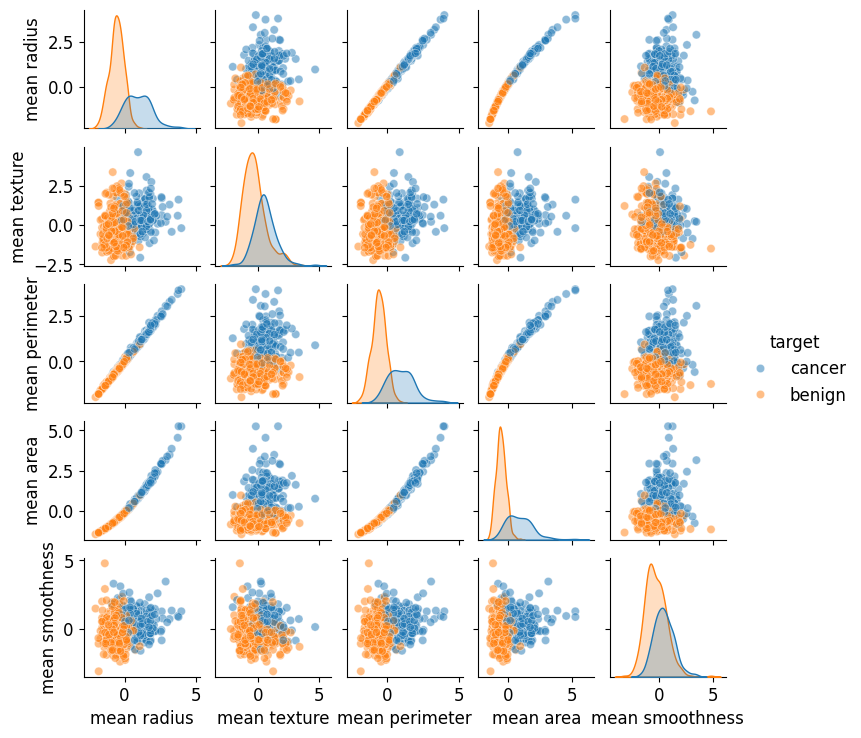

In [118]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the first 5 features
df = pd.DataFrame(X_standardized[:5].T, columns=data.feature_names[:5])

# Add the target variable to the DataFrame
df['target'] = ['benign' if y==1 else 'cancer' for y in Y]

# Plot the relationships
plt.rcParams.update({'font.size': 12})
sns.pairplot(df, hue='target', height=1.5, plot_kws={'alpha':0.5})

plt.show()


5. **Make a scatterplot** of the first two principal components of the patients. Compare the result with the ones from the previous point.


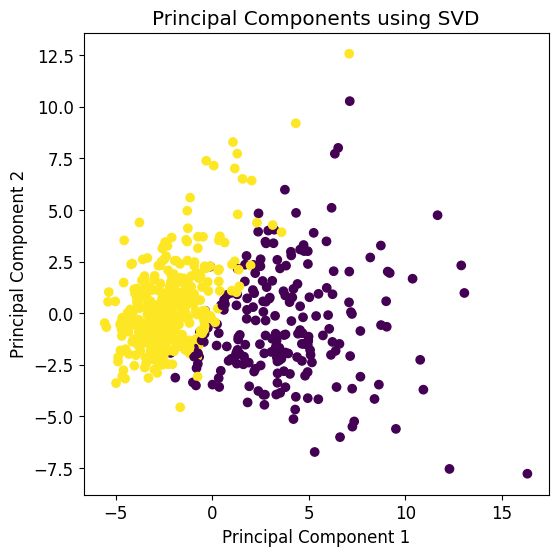

In [119]:
# plot pc_svd
plt.figure(figsize=(6, 6))
plt.scatter(pc_svd[0], pc_svd[1], c=Y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components using SVD')
plt.show()

#### Comment:

The variance introduced by the first two principal components is clearly bigger than the one introduced by any of the first 5 features.
Also the separability of the two classes appears to be better in the first two principal components than by using any pair of the first 5 features.
Nonetheless there is still a lot of overlap between the two classes, and it is possible that other directions could be more useful to separate the two classes, while it is not possible to have other direction representing more variance in the data.


6. **Compute and plot the explained variance ratio**, defined as:

   $$
   \text{Explained Variance Ratio} = \frac{\text{Variance of a Principal Component}}{\text{Total Variance}}
   $$

   *(Hint: It can be computed by exploiting the eigenvalues of the principal components.)*



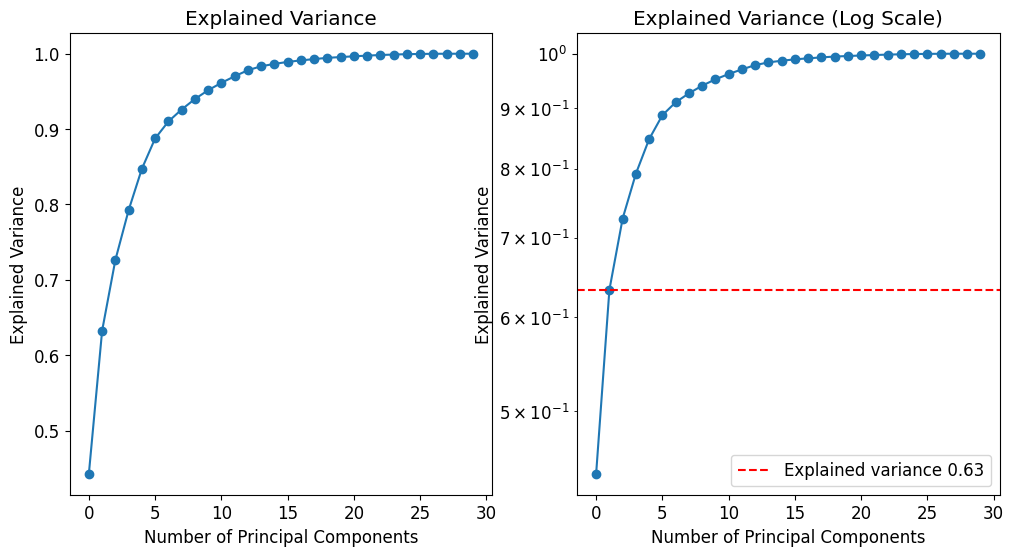

In [120]:
# plot the explained variance

U, s, VT = np.linalg.svd(X_standardized)
explained_variance = np.cumsum(s**2)/np.sum(s**2)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(explained_variance, 'o-')
ax[0].set_xlabel('Number of Principal Components')
ax[0].set_ylabel('Explained Variance')
ax[0].set_title('Explained Variance')

ax[1].semilogy(explained_variance, 'o-')
ax[1].set_xlabel('Number of Principal Components')
ax[1].set_ylabel('Explained Variance')
ax[1].axhline(explained_variance[1], color='red', linestyle='--', label='Explained variance {:.2f}'.format(explained_variance[1]))
ax[1].legend()
ax[1].set_title('Explained Variance (Log Scale)')

plt.show()


7. **What is the percentage of information lost** by selecting 2 components?  
   *(Compute the total variance explained by the first two components and compare it to the total variance.)*


#### Comment:

The explained variance by the first two principal components alone is 63% of the total variance, meaning that the information lost is 37% of the total variance (and information).


---

# Exercise 2

Load the data contained in the file `Concrete_Data.csv` as follows:

```python
import numpy as np

data = np.loadtxt("Concrete_Data.csv", delimiter=",")
A = data[:, :-1]
b = data[:, -1]
mean_A = np.mean(A, axis=0)
A = A - mean_A
std_A = np.std(A, axis=0)
A = A / std_A
```

The dataset contains the characteristics of $ n = 1030 $ samples of concrete. Each sample $ i $ is characterized by a feature vector $ \mathbf{x}_i $ (with 8 features) and by the corresponding target value $ y_i $, which is the concrete compressive strength (in MPa). 

Consider the **Least Squares** method where the objective function is given by:

$$
J(\mathbf{w}) = \frac{1}{2n} \| X\mathbf{w} - \mathbf{y} \|^2,
$$

where $ X $ is an $ n \times 8 $ matrix, $ \mathbf{y} $ is an $ n $-dimensional vector, and $ \mathbf{w} $ is a vector with 8 components.


## Tasks

1. **Prove** that the vector $ \mathbf{w}^* $ that minimizes $ J(\mathbf{w}) $ is given by:

   $$
   \mathbf{w}^* = (X^\top X)^{-1} X^\top \mathbf{y}.
   $$

2. **Show** how the SVD of $ X $ can be used to simplify the computation of $ \mathbf{w}^* $. Compute $ \mathbf{w}^* $ (using the SVD) and the corresponding value $ J(\mathbf{w}^*) $.

3. **Implement the Stochastic Gradient Descent (SGD)** method for minimizing $ J(\mathbf{w}) $.

4. **Run your function for computing $ \mathbf{w}^* $**. Perform 10,000 iterations with different values of the learning rate $ \eta $. Use a vector of all zeros as the initial guess.

5. **Modify your implementation** to have a decreasing learning rate given by:

   $$
   \eta_k = \frac{1}{\eta_0 (\sigma_{\min} k + 1)},
   $$

   where $ \eta_0 = 0.01 $, $ \sigma_{\min} $ is the smallest singular value of $ A $, and $ k $ is the iteration index.

6. **Plot** the value of the quantity $ J(\mathbf{w}_k) - J(\mathbf{w}^*) $ as a function of $ k $, for:
   - The case with a fixed learning rate.
   - The case with a decreasing learning rate.  

   Compare the two plots. **What do you observe?**


In [121]:
import numpy as np
import pandas as pd

data = np.loadtxt("Concrete_Data.csv", delimiter=",")
A = data[:, :-1]
b = data[:, -1]
mean_A = np.mean(A, axis=0)
A = A - mean_A
std_A = np.std(A, axis=0)
A = A / std_A

# describe the data
print("The matrix A has {} rows and {} columns".format(A.shape[0], A.shape[1]))
print("The vector b has {} elements".format(b.shape[0]))

print("Original data informations:")
df = pd.DataFrame(data)
df.describe()

The matrix A has 1030 rows and 8 columns
The vector b has 1030 elements
Original data informations:


,0,1,2,3,4,5,6,7,8
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


1. **Prove** that the vector $ \mathbf{w}^* $ that minimizes $ J(\mathbf{w}) $ is given by:

   $$
   \mathbf{w}^* = (X^\top X)^{-1} X^\top \mathbf{y}.
   $$

#### Proof:

To prove that the vector $ \mathbf{w}^* $ that minimizes $ J(\mathbf{w}) $ is given by $ \mathbf{w}^* = (X^\top X)^{-1} X^\top \mathbf{y} $, we can follow these steps:

1. **Define the objective function**:

$$
J(\mathbf{w}) = \frac{1}{2n} \| X\mathbf{w} - \mathbf{y} \|^2
$$

2. **Expand the norm**:
$$
J(\mathbf{w}) = \frac{1}{2n} (X\mathbf{w} - \mathbf{y})^\top (X\mathbf{w} - \mathbf{y})
$$

3. **Differentiate $ J(\mathbf{w}) $ with respect to $ \mathbf{w} $**:
$$
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \frac{1}{2n} \frac{\partial}{\partial \mathbf{w}} \left( (X\mathbf{w} - \mathbf{y})^\top (X\mathbf{w} - \mathbf{y}) \right)
$$

$$
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \frac{1}{2n} \cdot 2 X^\top (X\mathbf{w} - \mathbf{y})
$$

$$
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \frac{1}{n} X^\top (X\mathbf{w} - \mathbf{y})
$$

4. **Set the derivative to zero to find the minimum** (every stationary point would be a minimum given that least square is a quadratic, and therefore convex, function):
$$
\frac{1}{n} X^\top (X\mathbf{w} - \mathbf{y}) = 0
$$
$$
X^\top X \mathbf{w} = X^\top \mathbf{y}
$$

1. **Assuming $ X^\top X $ is invertible we can solve for $ \mathbf{w} $**:
$$
\mathbf{w}^* = (X^\top X)^{-1} X^\top \mathbf{y}
$$

2. **Show** how the SVD of $ X $ can be used to simplify the computation of $ \mathbf{w}^* $. Compute $ \mathbf{w}^* $ (using the SVD) and the corresponding value $ J(\mathbf{w}^*) $.

#### Proof:

1. **SVD of $ X $**:
$$
X = U \Sigma V^\top
$$
where $ U $ is an $ n \times n $ orthogonal matrix, $ \Sigma $ is an $ n \times 8 $ diagonal matrix with non-negative real numbers on the diagonal, and $ V $ is an $ 8 \times 8 $ orthogonal matrix.

2. **Substitute the SVD into the previous equation**:
$$
\mathbf{w}^* = (X^\top X)^{-1} X^\top \mathbf{y}
$$
$$
X^\top X = (V \Sigma^\top U^\top) (U \Sigma V^\top) = V \Sigma^\top \Sigma V^\top
$$
$$
(X^\top X)^{-1} = (V \Sigma^\top \Sigma V^\top)^{-1} = V (\Sigma^\top \Sigma)^{-1} V^\top
$$
$$
X^\top \mathbf{y} = V \Sigma^\top U^\top \mathbf{y}
$$
$$
\mathbf{w}^* = V (\Sigma^\top \Sigma)^{-1} V^\top V \Sigma^\top U^\top \mathbf{y} = V (\Sigma^\top \Sigma)^{-1} \Sigma^\top U^\top \mathbf{y}
$$


3. Exploit the Moore-Penrose pseudo inverse $ \Sigma^+ = (\Sigma^\top \Sigma)^{-1} \Sigma^\top $:
$$
\Sigma^+ = (\Sigma^\top \Sigma)^{-1} \Sigma^\top
$$
$$
\Sigma = \begin{bmatrix}
\Sigma_r\\
0\\
\end{bmatrix}
$$

$$
\Sigma_r = \begin{bmatrix}
\sigma_1 & 0 & ... & 0\\
0 & \sigma_2 & ... & 0\\
... & ... & ... & ...\\
0 & 0 & ... & \sigma_r\\
\end{bmatrix}
$$

$$
\Sigma^+ = (\begin{bmatrix}
\Sigma_r^{-1} & 0\\
\end{bmatrix} \cdot \begin{bmatrix}
\Sigma_r\\
0\\
\end{bmatrix})^-1 \cdot \begin{bmatrix}
\Sigma_r\\
0\\
\end{bmatrix}
$$

$$\Sigma^+ = (\begin{bmatrix}
\Sigma_r^2\\
\end{bmatrix})^-1 \cdot \begin{bmatrix}
\Sigma_r\\
0\\
\end{bmatrix}
$$

$$\Sigma^+ = 
\begin{bmatrix}
\frac{1}{\sigma_1^2} & 0 & ... & 0\\
0 & \frac{1}{\sigma_2^2} & ... & 0\\
... & ... & ... & ...\\
0 & 0 & ... & \frac{1}{\sigma_r^2}\\
\end{bmatrix}
\cdot \begin{bmatrix}
\Sigma_r\\
0\\
\end{bmatrix}
$$

$$\Sigma^+ = \begin{bmatrix}
\frac{1}{\sigma_1} & 0 & ... & 0\\
0 & \frac{1}{\sigma_2} & ... & 0\\
... & ... & ... & ...\\
0 & 0 & ... & \frac{1}{\sigma_r}\\
0 & 0 & ... & 0\\
... & ... & ... & ...\\
0 & 0 & ... & 0\\
\end{bmatrix}
$$

$$\Sigma^+ = \begin{bmatrix}
\Sigma_r^{-1}\\
0\\
\end{bmatrix}
$$

so that we can write:

$$
\mathbf{w}^* = V \Sigma^+ U^\top \mathbf{y}
$$

where $ \Sigma^+ $ is the Moore-Penrose pseudo inverse of $ \Sigma $ and it is very fast to compute once the SVD of $ X $ is available.







In [122]:
# Compute w* using the pseudoinverse

# Define the cost function J
def J(X, y, w):
	""" Compute the least square error."""
	return 0.5 * np.mean((X @ w - y)**2)

# Compute w* using the pseudoinverse
w_star = np.linalg.pinv(A) @ b
print("The optimal weights are: \n{}".format(w_star))
print("The loss is: {}".format(J(A, b, w_star)))


The optimal weights are: 
[12.51423615  8.95712234  5.62480067 -3.19983624  1.74485575  1.40559189
  1.61799518  7.21189448]
The loss is: 695.0617890478907


3. **Implement the Stochastic Gradient Descent (SGD)** method for minimizing $ J(\mathbf{w}) $.



In [123]:
from tqdm.notebook import tqdm

def SGD(X, y, J, gradJ, w0, lr=1e-2, iterations=10000):
	""" Perform Stochastic Gradient Descent on the dataset X with target y using the cost function J and learning rate lr."""
	# Initialize the weights
	weights = w0
	losses = []
	all_weights = []

	# Perform the optimization
	for _ in tqdm(range(iterations)):
		# Select a random sample
		i = np.random.randint(X.shape[0])

		# Compute the gradient
		grad = gradJ(X[i], y[i], weights)
		if np.isnan(grad).any():
			print("NaN values in the gradient")
			print("Divergence at iteration {}".format(_))
			break

		# Compute the loss
		loss = J(X, y, weights)
		losses.append(loss)
		all_weights.append(weights)

		# Update the weights
		weights = weights - lr * grad
	losses.append(J(X, y, weights))
	all_weights.append(weights)
	return weights, np.array(losses), np.array(all_weights)

4. **Run your function for computing $ \mathbf{w}^* $**. Perform 10,000 iterations with different values of the learning rate $ \eta $. Use a vector of all zeros as the initial guess.



In [124]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

etas = [1, 1e-1, 1e-2, 1e-3, 1e-4]

def J(X, y, w):
	""" Compute the least square error."""
	return 0.5 * np.mean((X @ w - y)**2)

J_jit = jax.jit(J)
gradJ = jax.grad(J_jit, argnums=2)

losses_lr = {}
weights_lr = {}

for lr in etas:
	sol, losses, weights = SGD(A, b, J_jit, gradJ, np.zeros(A.shape[1]), lr=lr)
	print("The weights found with learning rate {} are: {}".format(lr, sol))
	print("The final loss is: {}".format(losses[-1]))
	losses_lr[lr] = losses
	weights_lr[lr] = weights



  0%|          | 0/10000 [00:00<?, ?it/s]

NaN values in the gradient
Divergence at iteration 124
The weights found with learning rate 1 are: [ inf -inf  inf -inf  inf -inf -inf -inf]
The final loss is: nan


  0%|          | 0/10000 [00:00<?, ?it/s]

The weights found with learning rate 0.1 are: [ 17.824764  29.93934   34.367783 -10.493911   4.470527 -12.044035
  11.853405  22.900278]
The final loss is: 1396.181640625


  0%|          | 0/10000 [00:00<?, ?it/s]

The weights found with learning rate 0.01 are: [12.49317    9.9601555  6.7361994 -2.7828412  1.098198  -1.2496897
  1.7816327  7.720519 ]
The final loss is: 700.1263427734375


  0%|          | 0/10000 [00:00<?, ?it/s]

The weights found with learning rate 0.001 are: [ 8.404066   4.684305   1.4759157 -5.132073   2.548237  -2.108637
 -2.381647   7.4421577]
The final loss is: 697.5283203125


  0%|          | 0/10000 [00:00<?, ?it/s]

The weights found with learning rate 0.0001 are: [ 4.9786873  1.7282231 -0.8574279 -2.9740744  2.8550282 -1.2393966
 -2.1782582  3.9675994]
The final loss is: 708.8428344726562


5. **Modify your implementation** to have a decreasing learning rate given by:

   $$
   \eta_k = \frac{\eta_0}{\sigma_{\min} k + 1},
   $$

   where $ \eta_0 = 0.01 $, $ \sigma_{\min} $ is the smallest singular value of $ A $, and $ k $ is the iteration index.


In [125]:
# Compute the smallest singular value of A
_, s, _ = np.linalg.svd(A)
sigma_min = s[-1]

def SGD_decreasing_lr(X, y, J, gradJ, w0, eta_0=0.01, sigma_min=sigma_min, iterations=10000):
   """ Perform Stochastic Gradient Descent on the dataset X with target y using the cost function J and a decreasing learning rate."""
   # Initialize the weights
   weights = w0
   losses = []
   all_weights = []

   # Perform the optimization
   for k in tqdm(range(iterations)):
      # Select a random sample
      i = np.random.randint(X.shape[0])

      # Compute the gradient
      grad = gradJ(X[i], y[i], weights)
      if np.isnan(grad).any():
         print("NaN values in the gradient")
         print("Divergence at iteration {}".format(k))
         break

      # Compute the loss
      loss = J(X, y, weights)
      losses.append(loss)
      all_weights.append(weights)

      # Update the weights with decreasing learning rate
      lr = eta_0 / (sigma_min * (k + 1))
      weights = weights - lr * grad
   losses.append(J(X, y, weights))
   all_weights.append(weights)
   return weights, np.array(losses), np.array(all_weights)

sol, losses_var, weights_var = SGD_decreasing_lr(A, b, J_jit, gradJ, np.zeros(A.shape[1]), eta_0=0.01)
print("The weights found with decreasing learning rate are: {}".format(sol))
print("The final loss is: {}".format(losses_var[-1]))


  0%|          | 0/10000 [00:00<?, ?it/s]

The weights found with decreasing learning rate are: [ 0.07370723  0.03796464 -0.0586975   0.00565453  0.02146931 -0.05068517
  0.00663956  0.02134464]
The final loss is: 779.7342529296875


6. **Plot** the value of the quantity $ J(\mathbf{w}_k) - J(\mathbf{w}^*) $ as a function of $ k $, for:
   - The case with a fixed learning rate.
   - The case with a decreasing learning rate.  

   Compare the two plots. **What do you observe?**

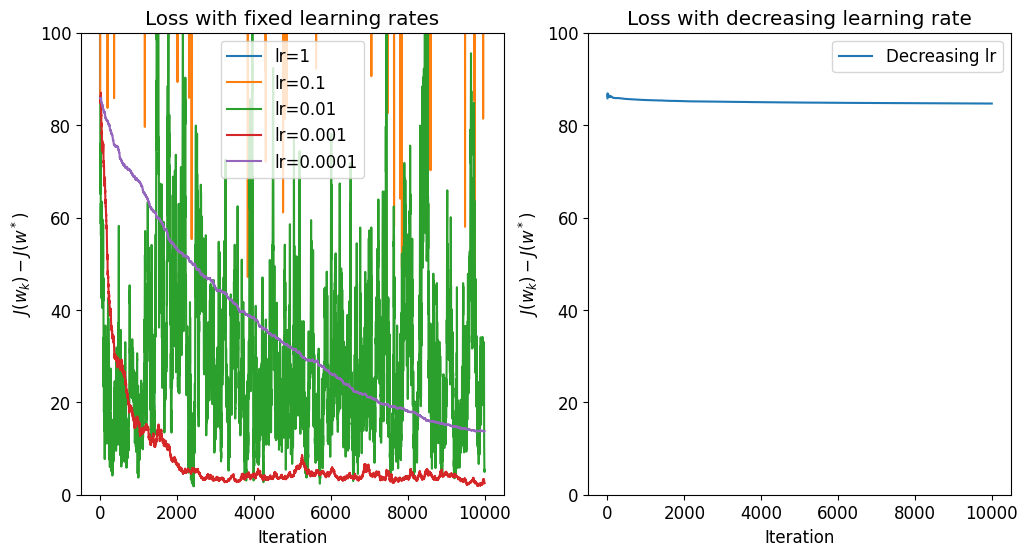

In [126]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
best_loss = J_jit(A, b, w_star)

# Plot losses for fixed learning rates
for lr in etas:
	ax[0].plot(losses_lr[lr] - best_loss, label=f'lr={lr}')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('$J(w_k) - J(w^*)$')
ax[0].set_title('Loss with fixed learning rates')
ax[0].set_ylim(0, 1e2)
ax[0].legend()

# Plot losses for decreasing learning rate
ax[1].plot(losses_var - best_loss, label='Decreasing lr')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('$J(w_k) - J(w^*)$')
ax[1].set_title('Loss with decreasing learning rate')
ax[1].set_ylim(0, 1e2)
ax[1].legend()

plt.show()

#### Comment:

As we can see from the plot, the decreasing learning rate allows to have a much smoother learning cure. Nonetheless lower values of the fixed learning rate are actually better than the decreasing learning rate. 
This may suggest that the decrease used is too fast slowing down the learning process too much and too far from the optimal value.
On the other hand having a fixed learning rate require to tune the parameter properly, given that too high values may not lead to convergence

# Exercise 3

Consider a perceptron that accepts complex inputs $ x_1 $ and $ x_2 $. The weights $ w_1 $ and $ w_2 $ are also complex numbers, and the threshold is zero. The perceptron fires if the condition $ \Re(x_1 w_1 + x_2 w_2) \geq \Im(x_1 w_1 + x_2 w_2) $ is satisfied. The binary input 0 is coded as the complex number $ (1, 0) $ and the binary input 1 as the number $ (0, 1) $.

How many of the logical functions of two binary arguments can be computed with this system? Can XOR be computed?


### Solution:


In [127]:
import cvxpy as cp
import numpy as np


def solve_multivariate_inequalities_cvxpy(inequalities, variables):
	"""
	Solve a system of multivariate inequalities using cvxpy.

	Parameters:
	inequalities (list): List of cvxpy inequalities (e.g., [x >= 0, y >= 0, 2*x + 3*y <= 6]).
	variables (list): List of cvxpy variables corresponding to the inequalities.

	Returns:
	str: Solution set or a message indicating whether the inequalities are feasible.
	"""
	try:
		# Combine inequalities into a feasibility problem
		problem = cp.Problem(cp.Minimize(0), inequalities)

		# Solve the problem
		problem.solve()

		if problem.status == cp.OPTIMAL:
			# Extract variable values
			solution = {str(var): var.value for var in variables}
			return f"Solution set: {solution}"
		elif problem.status == cp.INFEASIBLE:
			return "The system of inequalities is infeasible (no solution exists)."
		else:
			return f"The problem status is {problem.status}."
	except Exception as e:
		return f"An error occurred while solving the system: {e}"


# create the perceptron as described in the exercise
def perceptron(x1, x2, w1, w2):
	real_part =w1[0]*x1[0] - w1[1]*x1[1] + w2[0]*x2[0] - w2[1]*x2[1]
	imaginary_part = w1[0]*x1[1] + w1[1]*x1[0] + w2[0]*x2[1] + w2[1]*x2[0]
	return 1 if real_part>=imaginary_part else 0

# Define the ordered pairs of x1 and x2
x1s = np.array([[1, 0], [1, 0], [0, 1], [0, 1]])
x2s = np.array([[1, 0], [0, 1], [1, 0], [0, 1]])
xs = np.array([x1s, x2s])
xs.shape

# Define variables
w11 = cp.Variable()
w12 = cp.Variable()
w21 = cp.Variable()
w22 = cp.Variable()
x = cp.Variable()

A = [
	w11 - w12 + w21 - w22,
	w11 - w12 - w21 - w22,
	-w11 - w12 + w21 - w22,
	-w11 - w12 - w21 - w22
]

ys = [[i,j,h,k] for i in [0,1] for j in [0,1] for h in [0,1] for k in [0,1]]

solvable = 0
for y in ys:
	inequalities = []
	for value, yi in zip(A, y):
		if yi == 0:
			inequalities.append(value <= -1e-6)
		else:
			inequalities.append(value >= 0)
	# Solve the system
	solution = solve_multivariate_inequalities_cvxpy(inequalities, [w11, w12, w21, w22, x])
	if solution.startswith("Solution set"):
		solvable += 1
		print(f"Solution found for y={y}: {solution}")
		for idx, yi in enumerate(y):
			try:
				assert perceptron(x1s[idx], x2s[idx], [w11.value, w12.value], [w21.value, w22.value]) == yi
			except AssertionError:
				print("Assertion Error!")
				print(f"Error for y={y}, idx={idx}")
				print(f"Values: {w11.value, w12.value, w21.value, w22.value}")
				print(f"Expected: {yi}")
				print(f"x1: {x1s[idx]}")
				print(f"x2: {x2s[idx]}")
				print(f"Computed: {perceptron(x1s[idx], x2s[idx], [w11.value, w12.value], [w21.value, w22.value])}")
	else:
		print(f"No solution found for y={y}")

print(f"Number of solvable cases: {solvable}")
print(f"Number of unsolvable cases: {len(ys) - solvable}")


Solution found for y=[0, 0, 0, 0]: Solution set: {'var12953': array(-2.00174049e-15), 'var12954': array(0.5000005), 'var12955': array(9.89434791e-15), 'var12956': array(0.5000005), 'var12957': None}
Solution found for y=[0, 0, 0, 1]: Solution set: {'var12953': array(-0.66666747), 'var12954': array(0.33333401), 'var12955': array(-0.66666747), 'var12956': array(0.33333396), 'var12957': None}
Solution found for y=[0, 0, 1, 0]: Solution set: {'var12953': array(-0.66666747), 'var12954': array(0.33333398), 'var12955': array(0.66666747), 'var12956': array(0.33333399), 'var12957': None}
Solution found for y=[0, 0, 1, 1]: Solution set: {'var12953': array(-1.00000049), 'var12954': array(2.55812177e-07), 'var12955': array(-1.01339688e-14), 'var12956': array(2.44187825e-07), 'var12957': None}
Solution found for y=[0, 1, 0, 0]: Solution set: {'var12953': array(0.66666747), 'var12954': array(0.33333399), 'var12955': array(-0.66666747), 'var12956': array(0.33333398), 'var12957': None}
Solution found 

#### Comment:

1. The possible binary functions defined over n variables are $ 2^{2^n} $, as each of the $ 2^n $ possible inputs can be associated with one of the two possible outputs. In out case there are 16 possible functions.
2. Out of these 16 functions 14 can be computed using the given system. The only two functions that cannot be computed are the XOR and the XNOR functions. This is because the XOR and XNOR functions are not linearly separable, and therefore cannot be computed by a single layer perceptron.

#### Note:
I am not fully satisfied with such an answer given that point 2 is not really a proof. Nonetheless I am not able to provide a better answer at the moment.

Calculation to get matrix A and proof of non-solvability of XOR and XNOR functions are below:

<div style="display: flex; justify-content: center;">
	<img src="image.png" width="80%"/>
</div>